In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [2]:
adult=pd.read_csv('adult_with_headers.csv')
adult.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


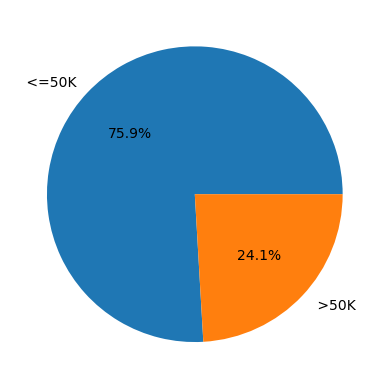

In [ ]:
# data set is imbalanced one
plt.pie(adult.income.value_counts(),labels=list(adult.income.unique()),autopct='%1.1f%%')
plt.show()

In [4]:
catagorical=[col for col in adult.columns if adult[col].dtype == 'object']

In [ ]:
adult[catagorical].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [ ]:
adult.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [ ]:
adult.workclass.unique().tolist()# to see spaces r there in categories names or not

[' State-gov',
 ' Self-emp-not-inc',
 ' Private',
 ' Federal-gov',
 ' Local-gov',
 ' ?',
 ' Self-emp-inc',
 ' Without-pay',
 ' Never-worked']

In [5]:
# lets delete spaces in categorical columns
adult[catagorical] = adult[catagorical].apply(lambda x : x.str.strip())

In [6]:
# seems there are ' ?'(unknown categories) let 's replace with forward fill
adult.replace('?',np.NaN,inplace=True)
adult.fillna(method='ffill',inplace=True)

In [ ]:
adult.workclass.value_counts()

workclass
Private             24094
Self-emp-not-inc     2688
Local-gov            2204
State-gov            1374
Self-emp-inc         1177
Federal-gov          1002
Without-pay            15
Never-worked            7
Name: count, dtype: int64

In [ ]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Feature Engineering
#### different transformations to correct skewness in data

<Axes: >

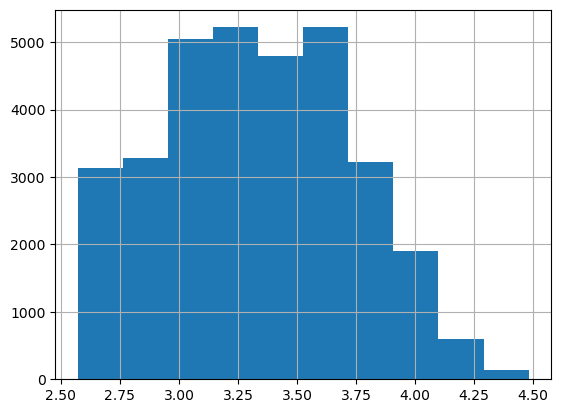

In [7]:
adult['age'] = np.cbrt(adult.age)
adult.age.hist()

<Axes: >

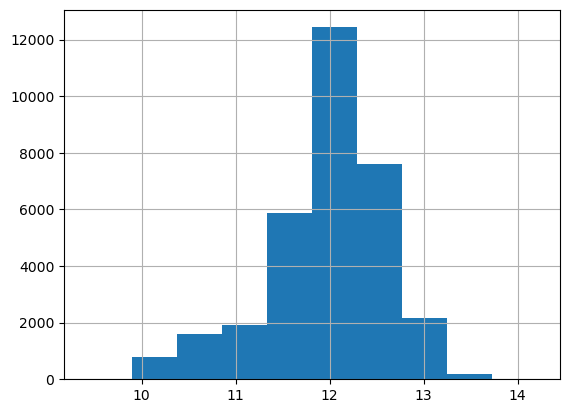

In [8]:
adult['fnlwgt'] = np.log(adult.fnlwgt)
adult.fnlwgt.hist()

<Axes: >

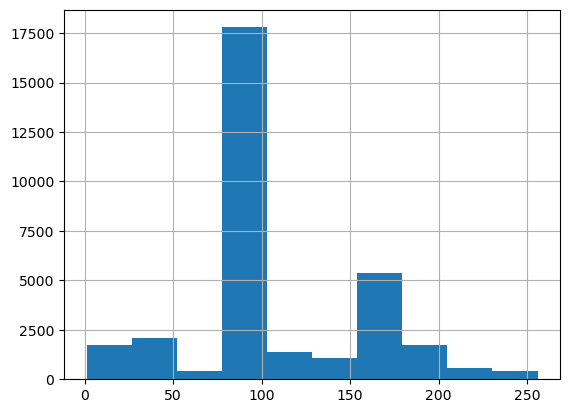

In [9]:
adult['education_num'] = np.square(adult.education_num)
adult.education_num.hist()

<Axes: >

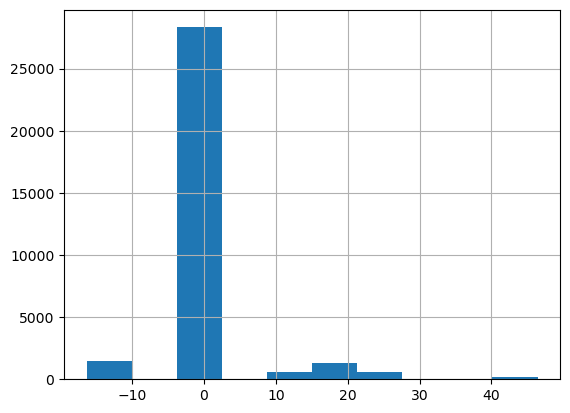

In [10]:
# new feature
adult['capital'] = np.cbrt(adult.capital_gain-adult.capital_loss)
adult.capital.hist()

<Axes: >

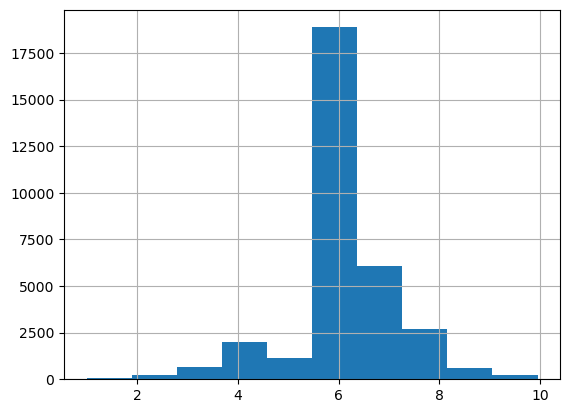

In [11]:
adult['hours_per_week'] = np.sqrt(adult.hours_per_week)
adult.hours_per_week.hist()

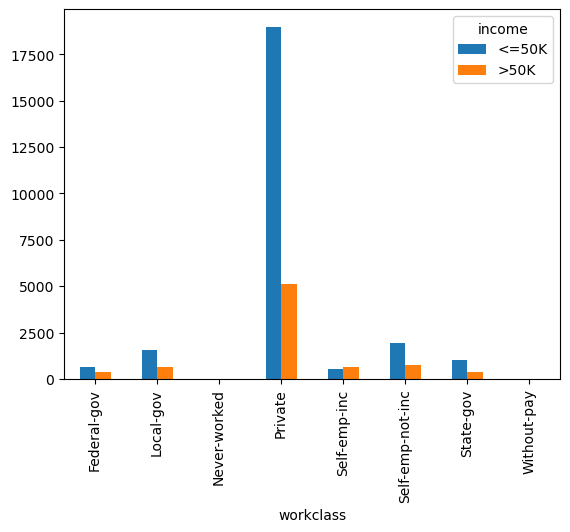

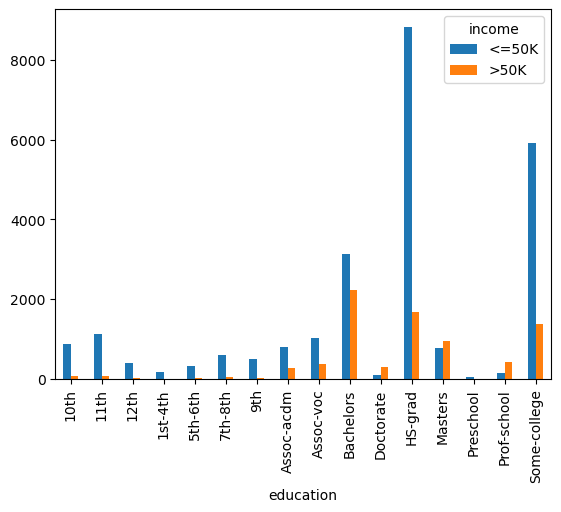

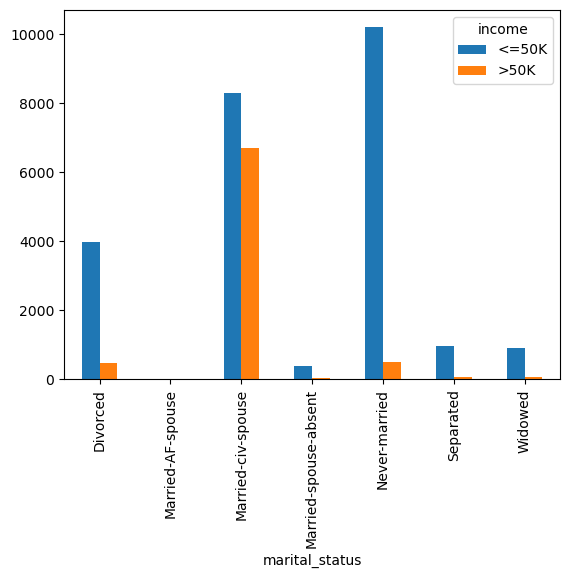

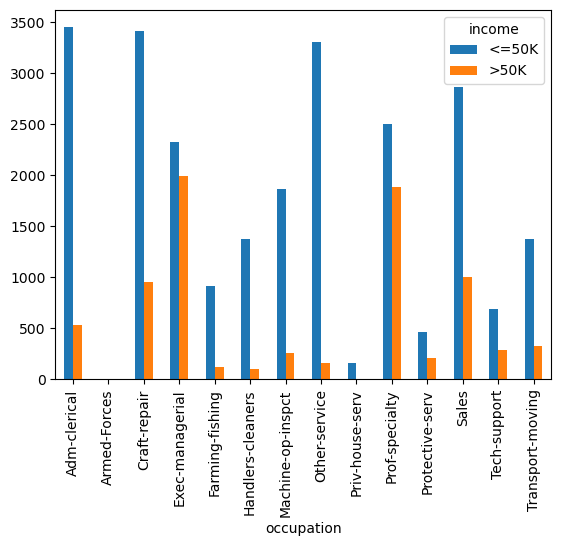

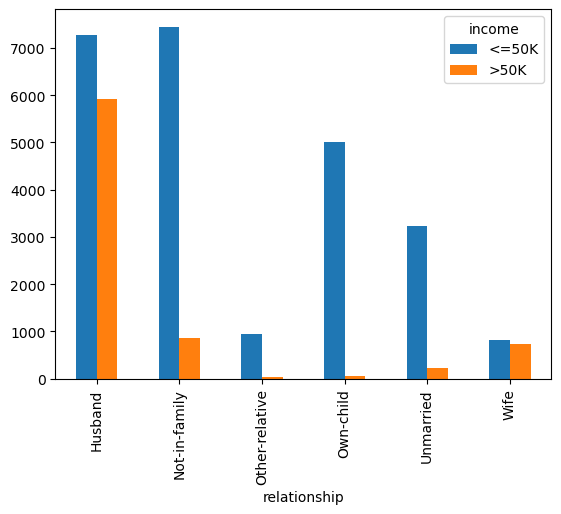

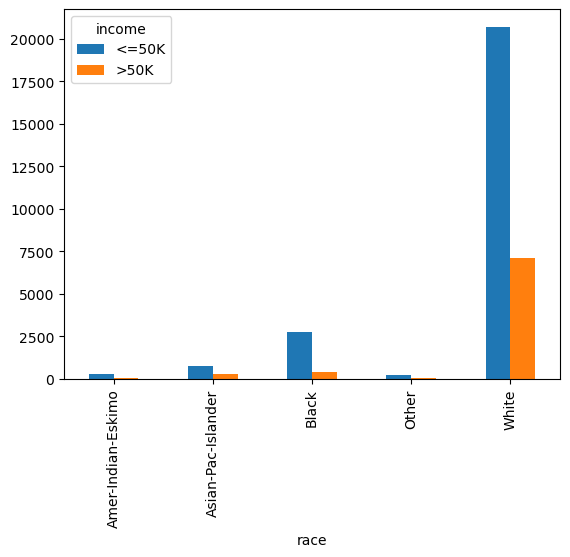

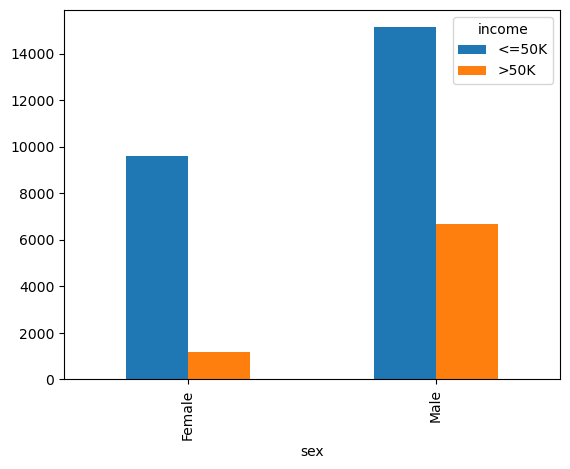

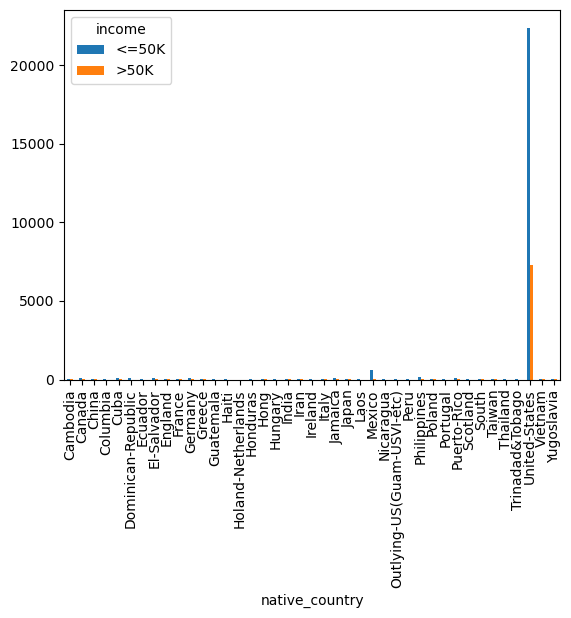

In [12]:
for col in catagorical :
    if col != 'income' :
        pd.crosstab(adult[col],adult.income).plot(kind="bar")

* most of the people from usa.So country may not be appropriate variable to decide income class so we can drop
* as most of the people belong to usa so white's dominating the data set so we can drop race column
* Education_num giving the same information as education so we can drop education
* relationship is saying about the person relation with his family
* occupation column is not considered completly ordinal so lets apply one hot encoding to occupation column * Ordinal encoding to rest categorical columns
* as we created new feature capital from captal gain & capital loss as it indicates the net income from his properties & liabilities

In [13]:
adult.drop(labels=['education','race','native_country','capital_gain','capital_loss'],axis=1,inplace=True)

In [ ]:
adult.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,sex,hours_per_week,income,capital
0,3.391211,State-gov,11.258240,169,Never-married,Adm-clerical,Not-in-family,Male,6.324555,<=50K,12.954476
1,3.684031,Self-emp-not-inc,11.330336,169,Married-civ-spouse,Exec-managerial,Husband,Male,3.605551,<=50K,0.000000
2,3.361975,Private,12.281393,81,Divorced,Handlers-cleaners,Not-in-family,Male,6.324555,<=50K,0.000000
3,3.756286,Private,12.366153,49,Married-civ-spouse,Handlers-cleaners,Husband,Male,6.324555,<=50K,0.000000
4,3.036589,Private,12.732011,169,Married-civ-spouse,Prof-specialty,Wife,Female,6.324555,<=50K,0.000000


#### applying OrdinalEncoder on ordinal categories

In [14]:
catcol = [col for col in adult.columns if adult[col].dtype == 'object']

In [15]:
for i in catcol :
    if i != 'income' :
        print(f'{i} = {adult[i].unique().tolist()}')

workclass = ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
marital_status = ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation = ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship = ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
sex = ['Male', 'Female']


In [16]:
# Predefined categories for each column
workclass = ['State-gov', 'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'Without-pay', 'Never-worked']
marital_status = ['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Widowed']
relationship = ['Other-relative', 'Not-in-family', 'Unmarried', 'Own-child', 'Husband', 'Wife']
sex = ['Female', 'Male']

# Use the actual category lists in the OrdinalEncoder
enc = OrdinalEncoder(categories=[workclass, marital_status, relationship, sex], dtype=int)

# Fit and transform the categorical columns
adult[['workclass', 'marital_status', 'relationship', 'sex']] = enc.fit_transform(adult[['workclass', 'marital_status', 'relationship', 'sex']])


#### applying OneHotEncoder

In [17]:
# lets assume occupation is not ordinal data so creating dummy variables to every category
oen=OneHotEncoder(sparse_output=False)
encoded = oen.fit_transform(adult[['occupation']])

In [ ]:
encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
oen.categories_

[array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object)]

In [19]:
adult[['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']]=encoded

In [20]:
adult.drop('occupation',axis=True,inplace=True)

#### applying LableEncoder

In [21]:
le=LabelEncoder()
adult['income'] = le.fit_transform(adult['income'])

In [ ]:
adult.head()

,age,workclass,fnlwgt,education_num,marital_status,relationship,sex,hours_per_week,income,capital,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,3.391211,0,11.258240,169,0,1,1,6.324555,0,12.954476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.684031,5,11.330336,169,1,4,1,3.605551,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.361975,3,12.281393,81,2,1,1,6.324555,0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.756286,3,12.366153,49,1,4,1,6.324555,0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.036589,3,12.732011,169,1,5,0,6.324555,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
# creating independent & dependent variables
X = adult.drop('income',axis=1)
Y = adult.loc[:,'income']

In [21]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,stratify=Y)

In [22]:
model=DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_split=19,)
model.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4, min_samples_split=19, random_state=42)

In [23]:
y_train_p=model.predict(train_x)
y_test_p=model.predict(test_x)

In [24]:
print(classification_report(y_train_p,train_y))
print(classification_report(y_test_p,test_y))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     21807
           1       0.52      0.77      0.62      4241

    accuracy                           0.85     26048
   macro avg       0.73      0.81      0.76     26048
weighted avg       0.88      0.85      0.86     26048

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5412
           1       0.52      0.74      0.61      1101

    accuracy                           0.84      6513
   macro avg       0.73      0.80      0.75      6513
weighted avg       0.87      0.84      0.85      6513



In [25]:
model.feature_importances_

array([0.00215565, 0.        , 0.00098952, 0.24900865, 0.        ,
       0.49085915, 0.        , 0.0059894 , 0.25099763, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

#### Applying min_max scaler

In [30]:
df=pd.DataFrame({'features' : X.columns,'importance' :model.feature_importances_})
df.sort_values(by='importance',ascending=False,inplace=True)
df
#see our new feature given more importance

,features,importance
5,relationship,0.490859
8,capital,0.250998
3,education_num,0.249009
7,hours_per_week,0.005989
0,age,0.002156
2,fnlwgt,0.000990
14,Handlers-cleaners,0.000000
21,Tech-support,0.000000
20,Sales,0.000000
19,Protective-serv,0.000000


In [31]:
scale=MinMaxScaler()
X_train=scale.fit_transform(train_x)
X_test=scale.transform(test_x)

In [32]:
model=KNeighborsClassifier()
params={'metric':['euclidean','hamming','minkowski','cosine'],'n_neighbors':np.arange(5,10)}

In [28]:
optimal_params=GridSearchCV(estimator=model,param_grid=params,scoring='f1_micro',cv=2,n_jobs=-1)
optimal_params.fit(X_train,train_y)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'hamming', 'minkowski',
                                    'cosine'],
                         'n_neighbors': array([5, 6, 7, 8, 9])},
             scoring='f1_micro')

In [29]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'metric': 'cosine', 'n_neighbors': 8}
0.8349969287469288


In [33]:
model=KNeighborsClassifier(n_neighbors=9,metric='cosine')
model.fit(X_train,train_y)

KNeighborsClassifier(metric='cosine', n_neighbors=9)

In [34]:
Y_ts_p=model.predict(X_test)

In [35]:
print(classification_report(test_y,Y_ts_p))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4945
           1       0.67      0.59      0.63      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.82      0.83      0.83      6513



#### Isolation Forest algorithm to identify and remove outliers.

In [23]:
adult_p = adult.copy()

In [24]:
clf = IsolationForest(random_state=10,contamination=0.025)
clf.fit(adult_p)

IsolationForest(contamination=0.025, random_state=10)

In [25]:
# predictions
y_pred_outliers = clf.predict(adult_p)
labels=pd.Series(y_pred_outliers)
adult_p["labels"]=labels
adult_p.labels.value_counts()

labels
 1    31747
-1      814
Name: count, dtype: int64

In [26]:
adult_p[adult_p.labels==-1]

,age,workclass,fnlwgt,education_num,marital_status,relationship,sex,hours_per_week,income,capital,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,labels
0,3.391211,0,11.258240,169,0,1,1,6.324555,0,12.954476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
8,3.141381,3,10.731624,196,0,1,0,7.071068,1,24.149529,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
52,3.608826,3,10.855821,225,1,5,0,7.745967,1,-12.389968,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
89,3.503398,1,12.926025,256,0,1,0,7.071068,1,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
106,2.571282,4,12.627651,36,0,3,0,5.656854,0,32.426263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32347,3.301927,0,12.265016,169,1,5,0,4.472136,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
32370,3.756286,5,11.831721,225,0,1,1,6.324555,1,30.303584,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
32386,3.892996,1,10.076979,81,1,5,0,6.324555,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
32545,3.391211,2,11.621771,144,1,5,0,4.472136,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [27]:
# drop outlayers & see the performance
# Drop rows where the 'labels' column is equal to -1
adult_p.drop(adult_p[adult_p.labels == -1].index, axis=0, inplace=True)

In [28]:
adult_p[adult_p.labels == -1]

,age,workclass,fnlwgt,education_num,marital_status,relationship,sex,hours_per_week,income,capital,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,labels


In [42]:
# droping labels column
adult_pps = adult_p.drop('labels',axis=1)

In [43]:
#### PPS (Predictive Power Score) to find the predictive power of variables with classes

In [44]:
adult_pps['income'] = adult_pps['income'].astype('category')

In [41]:
#!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.8 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=90da584de80f06dacd542d8f0d932c74ce2e2f9232131d0ff36e739b52792c96
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is

In [45]:
import ppscore as pps

In [46]:
s=pps.matrix(adult_pps)

In [52]:
s[s.y=='income'].sort_values(by='ppscore',ascending=False)
# this is same as we seen in DesicionTreeClassifier()_feature_impoetance

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
200,income,income,1.000000,predict_itself,True,None,0.000000,1.000000,None
224,capital,income,0.374423,classification,True,weighted F1,0.675942,0.797277,DecisionTreeClassifier()
80,education_num,income,0.213697,classification,True,weighted F1,0.675942,0.745192,DecisionTreeClassifier()
176,hours_per_week,income,0.006310,classification,True,weighted F1,0.675942,0.677986,DecisionTreeClassifier()
8,age,income,0.000000,classification,True,weighted F1,0.675942,0.675724,DecisionTreeClassifier()
344,Farming-fishing,income,0.000000,classification,True,weighted F1,0.675942,0.675942,DecisionTreeClassifier()
536,Tech-support,income,0.000000,classification,True,weighted F1,0.675942,0.675942,DecisionTreeClassifier()
512,Sales,income,0.000000,classification,True,weighted F1,0.675942,0.675942,DecisionTreeClassifier()
488,Protective-serv,income,0.000000,classification,True,weighted F1,0.675942,0.675942,DecisionTreeClassifier()
464,Prof-specialty,income,0.000000,classification,True,weighted F1,0.675942,0.675942,DecisionTreeClassifier()


In [49]:
# now lets drop unimportant columns & build the model again

In [29]:
new_df=adult_p[['relationship','capital','education_num','hours_per_week','age','fnlwgt','income']]

In [30]:
new_df.head()

,relationship,capital,education_num,hours_per_week,age,fnlwgt,income
1,4,0.0,169,3.605551,3.684031,11.330336,0
2,1,0.0,81,6.324555,3.361975,12.281393,0
3,4,0.0,49,6.324555,3.756286,12.366153,0
4,5,0.0,169,6.324555,3.036589,12.732011,0
5,5,0.0,196,6.324555,3.332222,12.558777,0


In [31]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [33]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,stratify=y)

In [37]:
scale=StandardScaler()
X_train=scale.fit_transform(train_x)
X_test=scale.transform(test_x)

In [38]:
model=KNeighborsClassifier(n_neighbors=9,metric='cosine')
model.fit(X_train,train_y)

KNeighborsClassifier(metric='cosine', n_neighbors=9)

In [39]:
Y_ts_p=model.predict(X_test)
print(classification_report(test_y,Y_ts_p))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4894
           1       0.66      0.57      0.61      1456

    accuracy                           0.83      6350
   macro avg       0.77      0.74      0.75      6350
weighted avg       0.83      0.83      0.83      6350



# comparisions

#### Discuss the scenarios where each scaling technique is preferred and why
* Scaling techniques applied to bring all input features to a common scale so that because features having higher values will not dominate & machine learning model will capture variance effectively without any bias
* when we have dummy variables we apply MinMax scaller so that all feature values will be b/w 0 & 1 so that our ML model can effectively capture variance
#### Discuss the pros and cons of One-Hot Encoding and Label Encoding
* in lable encoding we cannot give our desired order to be encoded, in case of ordinal categories this is a challenge so for input featuers we apply OrdinalEncoder & for Taget variable we apply LableEncoder
* One-Hot Encoding treats each category as a separate entity without assuming any order. This is beneficial for nominal data where categories do not have a natural ranking (e.g., color, brand).
* One-Hot Encoding can lead to a significant increase in the number of features, especially with categorical variables that have many unique values. This can result in increased computational costs and potential overfitting.
* The resulting datasetcan become sparse (many zeros), which might lead to inefficiencies in some models that are sensitive to high dimensionality
* Label Encoding converts categories into integers, making it straightforward and memory-efficient, especially for datasets with many unique categories
* Since it requires only one column, it can be more memory efficient, especially with categorical variables having a large number of unique values.
#### Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance
* Isolation Forest is a popular algorithm specifically designed for anomaly detection. It identifies outliers by isolating observations in the dataset. The basic idea is that anomalies are fewer and different, making them easier to isolate compared to normal observations.
#### How Outliers Can Affect Model Performance
* Skewed Predictions: Outliers can skew the predictions of models, particularly linear models, by affecting the regression coefficients. This can lead to biased estimates that do not generalize well.

* Increased Model Complexity: Many machine learning algorithms assume that the underlying data follows a specific distribution. Outliers can cause algorithms to overfit, learning noise in the training data rather than the underlying signal.

* Metric Distortion: Outliers can distort performance metrics. For example, they can inflate error metrics like Mean Squared Error (MSE), leading to misleading conclusions about model performance.

* Decreased Robustness: Models trained on data with significant outliers can become sensitive to these extreme values, reducing their robustness and reliability in real-world applications.

* Convergence Issues: In algorithms that rely on gradient descent, outliers can lead to slow convergence or divergence due to extreme values affecting the gradient calculations.